In [2]:
import pickle
import numpy as np

with open("../../../data/caprice/caprice_seq_states.pkl", "rb") as fin:
    states = pickle.load(fin)

In [4]:
states[0]["hiddens"].shape

(13, 768)

In [37]:
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm
clf_props = []
labels = np.array([x["label"] for x in states])

for layer_i in tqdm(range(1, 13)):    
    layer_x = np.vstack([x["hiddens"][layer_i, :] for x in states])
    clf = LogisticRegression(random_state=3234, max_iter=1000, class_weight="balanced").fit(layer_x, labels)
    acc = clf.score(layer_x, labels)
    clf_props.append({"acc": acc, "coef": clf.coef_, "intercept": clf.intercept_})

In [20]:
from matplotlib import pyplot as plt

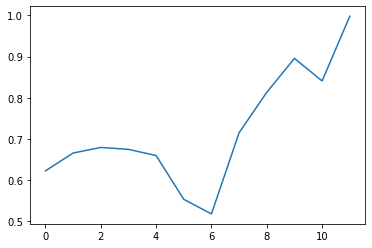

In [38]:
plt.plot([x["acc"] for x in clf_props])

In [48]:
import tabulate
tab = tabulate.tabulate([[f"Layer {i+1}", x["acc"]] for i, x in enumerate(clf_props)], headers=["Layer", "Acc"])
print(tab)

Layer          Acc
--------  --------
Layer 1   0.62254
Layer 2   0.665832
Layer 3   0.679428
Layer 4   0.674776
Layer 5   0.65975
Layer 6   0.553488
Layer 7   0.518068
Layer 8   0.715206
Layer 9   0.813238
Layer 10  0.895528
Layer 11  0.840787
Layer 12  0.997853


In [42]:
sum([np.argmax(x["logits"]) == x["label"] for x in states]) / len(states)

0.962432915921288

In [72]:
import umap
layer_i = 9
layer_data = np.vstack([x["hiddens"][layer_i, :] for x in states])

In [73]:
umap_inst = umap.UMAP(n_components=2, n_neighbors=50, metric="cosine")
proj = umap_inst.fit_transform(layer_data)

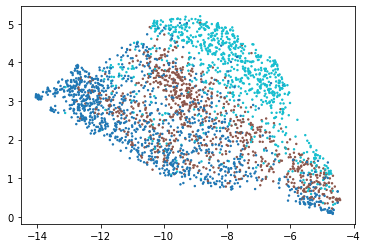

In [74]:
plt.scatter(proj[:, 0], proj[:, 1], c=labels, s=2, cmap="tab10")